In [1]:
import pathlib
import numpy as np

import torch

import neural_classifier

import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, confusion_matrix

from neural_utils import prepare_data, split_data_respect_years

In [4]:
ZERO_DROP_RATIO = 0.9
BATCH_SIZE = 2048

## Hyperparameter search using crossvalidation

In [5]:
NUM_FOLDS = 2

configs = []

for layer_nodes in [[48,48,32], [64,48,48,32]]:
    for lr in [1e-4,1e-3,1e-2]:
        for weight_decay in [lr/100, lr/10]:
            configs.append({"lr": lr, "layer_nodes": layer_nodes, "weight_decay": weight_decay},)
for config in configs:
    print(config)
NUM_EPOCHS = 20



{'lr': 0.0001, 'layer_nodes': [48, 48, 32], 'weight_decay': 1e-06}
{'lr': 0.0001, 'layer_nodes': [48, 48, 32], 'weight_decay': 1e-05}
{'lr': 0.001, 'layer_nodes': [48, 48, 32], 'weight_decay': 1e-05}
{'lr': 0.001, 'layer_nodes': [48, 48, 32], 'weight_decay': 0.0001}
{'lr': 0.01, 'layer_nodes': [48, 48, 32], 'weight_decay': 0.0001}
{'lr': 0.01, 'layer_nodes': [48, 48, 32], 'weight_decay': 0.001}
{'lr': 0.0001, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 1e-06}
{'lr': 0.0001, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 1e-05}
{'lr': 0.001, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 1e-05}
{'lr': 0.001, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 0.0001}
{'lr': 0.01, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 0.0001}
{'lr': 0.01, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 0.001}


In [6]:
# Crossval

train_data, _, _ = prepare_data(classification = True, 
                                zero_drop_ratio=ZERO_DROP_RATIO)

class1_weight = 1 
print(f"Positive class weighted at {class1_weight}")

len_for_crossval = len(train_data) // 8
print("Samples:", len_for_crossval)
rng = np.random.default_rng(37)
rng.shuffle(train_data)
train_data = train_data[:len_for_crossval, :]


training_stats = []

for (config_index, config) in enumerate(configs):
    curr_training_stats = []
    print(f"CONFIG {config_index}")
    torch.manual_seed(37) # model order should not matter
    for i, (train_index, val_index) in enumerate(split_data_respect_years(train_data, NUM_FOLDS)):
        print(f"Fold {i+1}:")
        x_train = train_data[train_index, :-1]
        y_train = train_data[train_index, -1]
        
        x_val = train_data[val_index, :-1]
        y_val = train_data[val_index, -1]
            
        x_train = torch.from_numpy(x_train).to("cpu", dtype=torch.float32)
        y_train = torch.from_numpy(y_train).to("cpu", dtype=torch.float32)
        x_val = torch.from_numpy(x_val).to("cpu", dtype=torch.float32)
        y_val = torch.from_numpy(y_val).to("cpu", dtype=torch.float32)

        _best_model, results = neural_classifier.train_model(
            x_train, y_train, x_val, y_val, 
            num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, pos_weight=class1_weight, patience=NUM_EPOCHS,
            **config
        )
        curr_training_stats.append(results)
    training_stats.append(curr_training_stats)

training_stats = np.array(training_stats)


Splitting with canton [3] as test set:
Total flows: 19,237,044
Train size: 17,825,332 rows (92.7%)
Test size: 1,411,712 rows (7.3%)
Splitting with canton [19] as test set:
Total flows: 17,825,332
Train size: 14,455,252 rows (81.1%)
Test size: 3,370,080 rows (18.9%)
Positive class weighted at 1
Samples: 202106
CONFIG 0
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:45<00:00,  2.26s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:44<00:00,  2.25s/it]


CONFIG 1
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:44<00:00,  2.24s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:46<00:00,  2.35s/it]


CONFIG 2
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:47<00:00,  2.40s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:46<00:00,  2.30s/it]


CONFIG 3
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:47<00:00,  2.36s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:46<00:00,  2.31s/it]


CONFIG 4
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:46<00:00,  2.34s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:48<00:00,  2.41s/it]


CONFIG 5
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:46<00:00,  2.34s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:47<00:00,  2.37s/it]


CONFIG 6
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:53<00:00,  2.66s/it]


CONFIG 7
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:45<00:00,  2.27s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:33<00:00,  1.67s/it]


CONFIG 8
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [00:32<00:00,  1.63s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [00:36<00:00,  1.82s/it]


CONFIG 9
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [01:07<00:00,  3.36s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [01:11<00:00,  3.56s/it]


CONFIG 10
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [01:04<00:00,  3.24s/it]


CONFIG 11
Fold 1:


Training 20 epochs:: 100%|██████████| 20/20 [01:16<00:00,  3.82s/it]


Fold 2:


Training 20 epochs:: 100%|██████████| 20/20 [01:20<00:00,  4.00s/it]


In [7]:
with open("classification_results_crossval.npy", "wb") as f:
    np.save(f, training_stats)

### Interpretation of Results

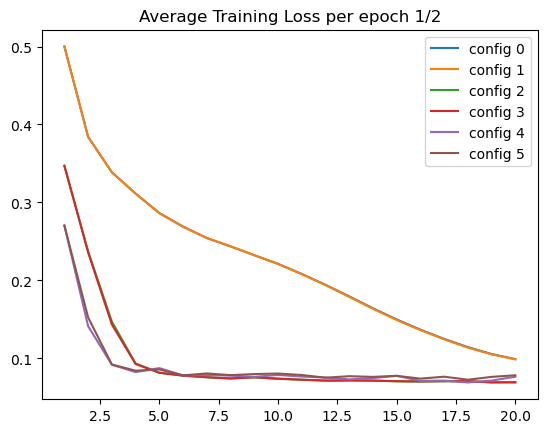

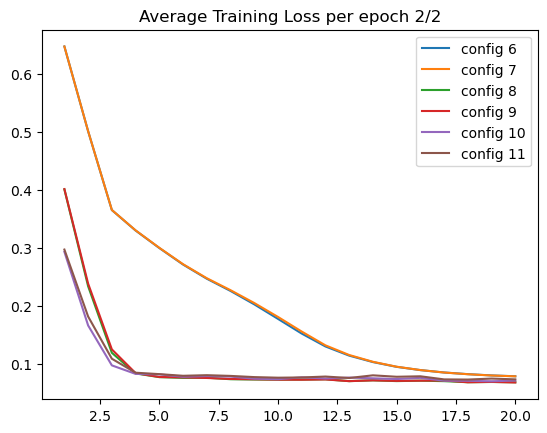

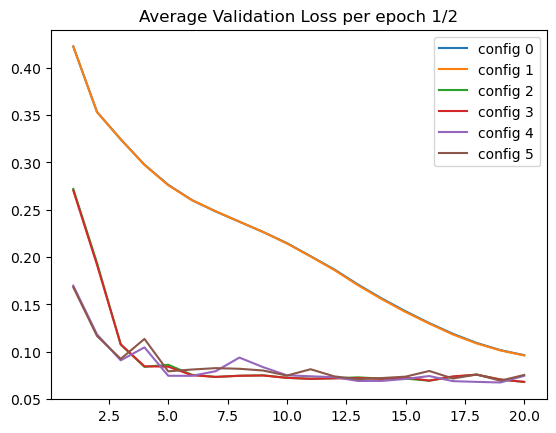

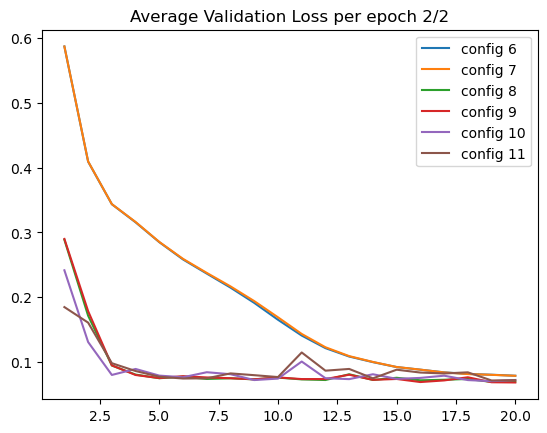

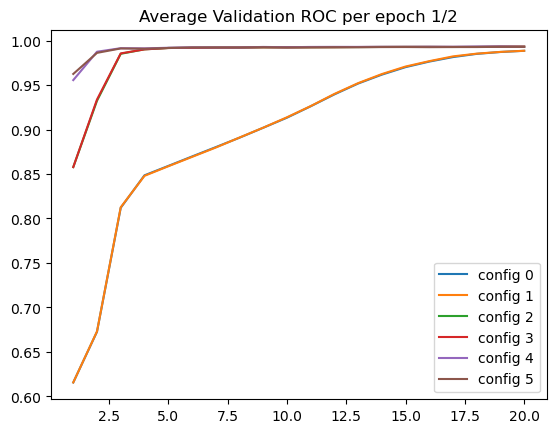

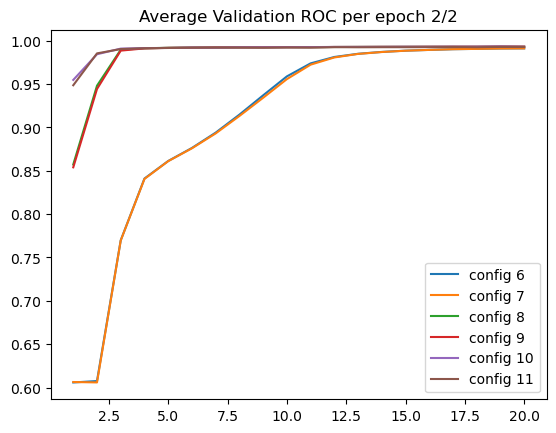

In [8]:
with open("classification_results_crossval.npy", "rb") as f:
    training_stats = np.load(f)

NUM_EPOCHS = 20

plt.style.use('default')  
# average across folds
average_trainloss = np.mean(training_stats[:, :, 0, :], axis=1)
average_valloss = np.mean(training_stats[:, :, 1, :], axis=1)
average_valrocs = np.mean(training_stats[:, :, 2, :], axis=1)

x_values = np.arange(NUM_EPOCHS) + 1
for metric in [("Average Training Loss per epoch", average_trainloss),
               ("Average Validation Loss per epoch", average_valloss),
               ("Average Validation ROC per epoch", average_valrocs)
               ]:
    
    for config_index in range(len(training_stats)):
        plt.plot(x_values, metric[1][config_index], label=f"config {config_index}")
        if config_index == 5:
            plt.legend()
            plt.title(metric[0] + " 1/2")
            plt.show()
    plt.title(metric[0] + " 2/2")
    plt.legend()
    plt.show()


## Training the chosen model

In [ ]:
# config 7
best_config = {'lr': 0.0001, 'layer_nodes': [64, 48, 48, 32], 'weight_decay': 1e-05}

train_data, val_data, _ = prepare_data(classification=True, zero_drop_ratio=ZERO_DROP_RATIO)

class1_weight = 1 
print(f"Positive class weighted at {class1_weight}")

x_train = train_data[:, :-1]
y_train = train_data[:, -1]

x_val = val_data[:, :-1]
y_val = val_data[:, -1]
            
x_train = torch.from_numpy(x_train).to("cpu", dtype=torch.float32)
y_train = torch.from_numpy(y_train).to("cpu", dtype=torch.float32)
x_val = torch.from_numpy(x_val).to("cpu", dtype=torch.float32)
y_val = torch.from_numpy(y_val).to("cpu", dtype=torch.float32)


torch.manual_seed(37)
best_model, results = neural_classifier.train_model(
    x_train, y_train, x_val, y_val, 
    batch_size=BATCH_SIZE, num_epochs=60, patience=10, pos_weight=class1_weight, 
    **best_config
)

Splitting with canton [3] as test set:
Total flows: 19,237,044
Train size: 17,825,332 rows (92.7%)
Test size: 1,411,712 rows (7.3%)
Test cantons: [3]
Splitting with canton [19] as test set:
Total flows: 17,825,332
Train size: 14,455,252 rows (81.1%)
Test size: 3,370,080 rows (18.9%)
Test cantons: [19]
Positive class weighted at 1


Training 60 epochs::  30%|███       | 18/60 [15:20<35:47, 51.14s/it]

Out of patience. Ending training


In [20]:
results2 = np.array(results)
with open("classification_results_model.npy", "wb") as f:
    np.save(f, results2)

In [22]:
print(results2)

[[0.25727 0.07816 0.07308 0.07138 0.06982 0.06855 0.06731 0.06641 0.06572
  0.06503 0.06448 0.06409 0.0638  0.06333 0.06305 0.06283 0.06259 0.06237
  0.06209]
 [0.07168 0.05177 0.05808 0.06703 0.05563 0.05377 0.05503 0.05371 0.05875
  0.05116 0.05104 0.06392 0.05149 0.05345 0.05236 0.06274 0.05281 0.05138
  0.05788]
 [0.99154 0.99262 0.9928  0.99301 0.99331 0.9934  0.99357 0.99361 0.99375
  0.99378 0.99388 0.99391 0.99395 0.99401 0.99401 0.99407 0.99412 0.99417
  0.99413]
 [0.99154 0.99262 0.9928  0.99301 0.99331 0.9934  0.99357 0.99361 0.99375
  0.99378 0.99388 0.99391 0.99395 0.99401 0.99401 0.99407 0.99412 0.99417
  0.99413]]


In [23]:
# save model parameters
save_path = pathlib.Path("./checkpoints/best_neural_classifier.pt")

In [24]:
torch.save(best_model, save_path)

## Evaluating the Model, Choosing Best Threshold

In [ ]:
save_path = pathlib.Path("./checkpoints/best_neural_classifier.pt")
model = neural_classifier.FCNN([64,48,48,32])
model.load_state_dict(torch.load(save_path, weights_only=True))
model.eval()

FCNN(
  (stack): Sequential(
    (0): Linear(in_features=29, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=48, bias=True)
    (3): ReLU()
    (4): Linear(in_features=48, out_features=48, bias=True)
    (5): ReLU()
    (6): Linear(in_features=48, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [26]:
_, val_data, test_data = prepare_data(classification=True, zero_drop_ratio=1) 
# drop ratio only matters for training set

Splitting with canton [3] as test set:
Total flows: 19,237,044
Train size: 17,825,332 rows (92.7%)
Test size: 1,411,712 rows (7.3%)
Test cantons: [3]
Splitting with canton [19] as test set:
Total flows: 17,825,332
Train size: 14,455,252 rows (81.1%)
Test size: 3,370,080 rows (18.9%)
Test cantons: [19]


### Finding the best threshold

In [27]:
# get all outputs for validation set
x_val = val_data[:, :-1]
y_val = val_data[:, -1]
x_val = torch.from_numpy(x_val).to("cpu", dtype=torch.float32)
y_val = torch.from_numpy(y_val).to("cpu", dtype=torch.float32)
val_set = torch.utils.data.TensorDataset(x_val, y_val)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4096, shuffle=False)
outputs = np.array([])
with torch.no_grad():
    for x, y in val_loader:    
        logits = model(x).squeeze(1)
        outputs = np.append(outputs, torch.sigmoid(logits).numpy())

In [28]:
# choose threshold based on F1 score on validation set
best_threshold = -1
best_f1 = -1

precisions, recalls, thresholds = precision_recall_curve(y_val, outputs)
for t_index in range(len(thresholds)):
    #print(thresholds[t_index])
    prec = precisions[t_index]
    recall = recalls[t_index]
    f1 = 2*(prec*recall)/(prec + recall + 1e-10)
    #print(f"Threshold {thresholds[t_index]}: {f1}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresholds[t_index]

print("Best Threshold:", best_threshold)
print("with f1:", best_f1)
THRESHOLD = best_threshold

Best Threshold: 0.9071982502937317
with f1: 0.6814457948681981


### Application to test data

In [29]:
THRESHOLD = 0.9071982502937317

In [34]:
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

x_test = torch.from_numpy(x_test).to("cpu", dtype=torch.float32)
y_test = torch.from_numpy(y_test).to("cpu", dtype=torch.float32)
test_set = torch.utils.data.TensorDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4096, shuffle=False)
predictions = np.array([])
with torch.no_grad():
    for x, y in test_loader:    
        logits = model(x).squeeze(1)
        predictions = np.append(predictions, np.where(torch.sigmoid(logits).numpy() >= THRESHOLD, 1, 0))

test_f1_score = f1_score(y_test, predictions)
test_acc_score = accuracy_score(y_test, predictions)
test_confusion_matrix = confusion_matrix(y_test, predictions)

print("F1 score on test set:", test_f1_score)
print("Accuracy on test set:", test_acc_score)
print("Confusion Matrix:", test_confusion_matrix)

F1 score on test set: 0.6716244354904135
Accuracy on test set: 0.9913983872064557
Confusion Matrix: [[1387151    4518]
 [   7625   12418]]
